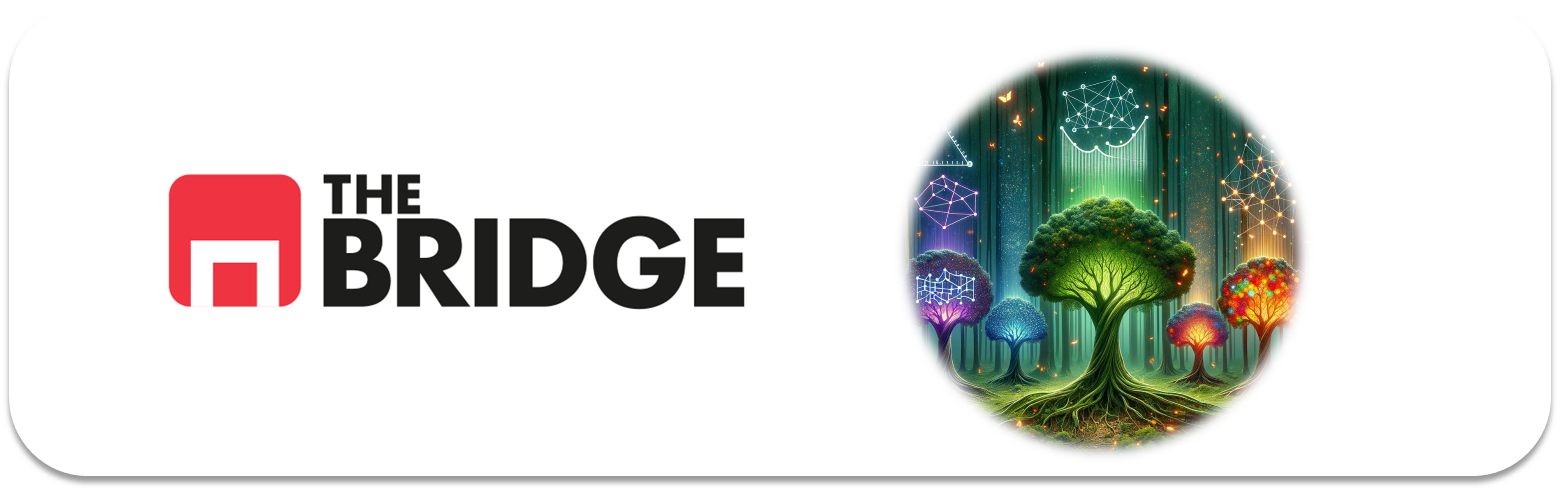

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

Los modelos de los árboles de decisión funcionan de forma diferente. 

In [1]:
2+2+2

6

In [4]:
#Importamos los paquetes y módulos:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import seaborn as sns
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc("ytick", labelsize=12)

In [22]:
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship, plot_grouped_histograms

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
  09 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### PRIMER VISTAZO

In [5]:
#Cargamos el dataset:
df=pd.read_csv("./data/bank-full.csv", sep=";")

In [8]:
#Visualizamos primeros valores
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
#En principio, no tiene nulos. En cambio, si hay valores "unknown".
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#Info del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Análisis de unknown

for col in df.columns:
    print(f"Para {col}, unknowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)



Para age, unknowns o missings: 0
Para job, unknowns o missings: 288, 0.64%
Para marital, unknowns o missings: 0
Para education, unknowns o missings: 1857, 4.11%
Para default, unknowns o missings: 0
Para balance, unknowns o missings: 0
Para housing, unknowns o missings: 0
Para loan, unknowns o missings: 0
Para contact, unknowns o missings: 13020, 28.8%
Para day, unknowns o missings: 0
Para month, unknowns o missings: 0
Para duration, unknowns o missings: 0
Para campaign, unknowns o missings: 0
Para pdays, unknowns o missings: 0
Para previous, unknowns o missings: 0
Para poutcome, unknowns o missings: 36959, 81.75%
Para y, unknowns o missings: 0


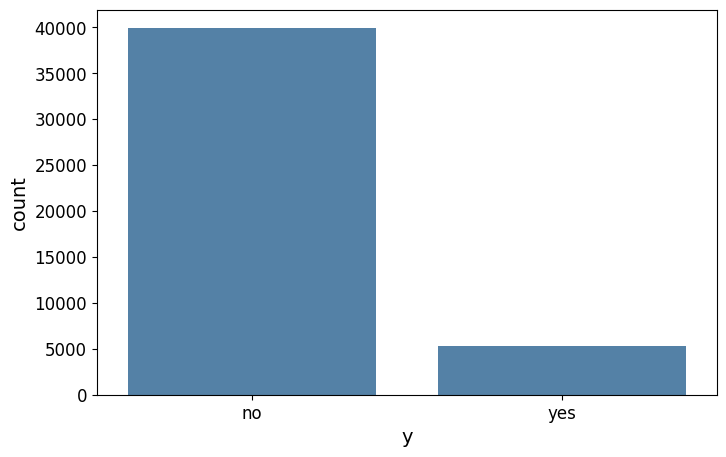

In [11]:
#IDENTIFICACIÓN DE TARGET: columna "y"
#Analizamos la distribución:
target="y"
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=target, color="steelblue");

In [15]:
#poutcome tiene un montón de nulos (unknown)!!
df.poutcome.value_counts()*100

poutcome
unknown    3695900
failure     490100
other       184000
success     151100
Name: count, dtype: int64

In [ ]:
#poutcome tiene un montón de nulos (unknown)!!
df.contact.value_counts(True)*100

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64

In [16]:
#Definimos lista de variables numéricas:
col_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if "y" in col_num:
    col_num.remove("y")

print(f"Las columnas numéricas son: {col_num}.")

Las columnas numéricas son: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'].


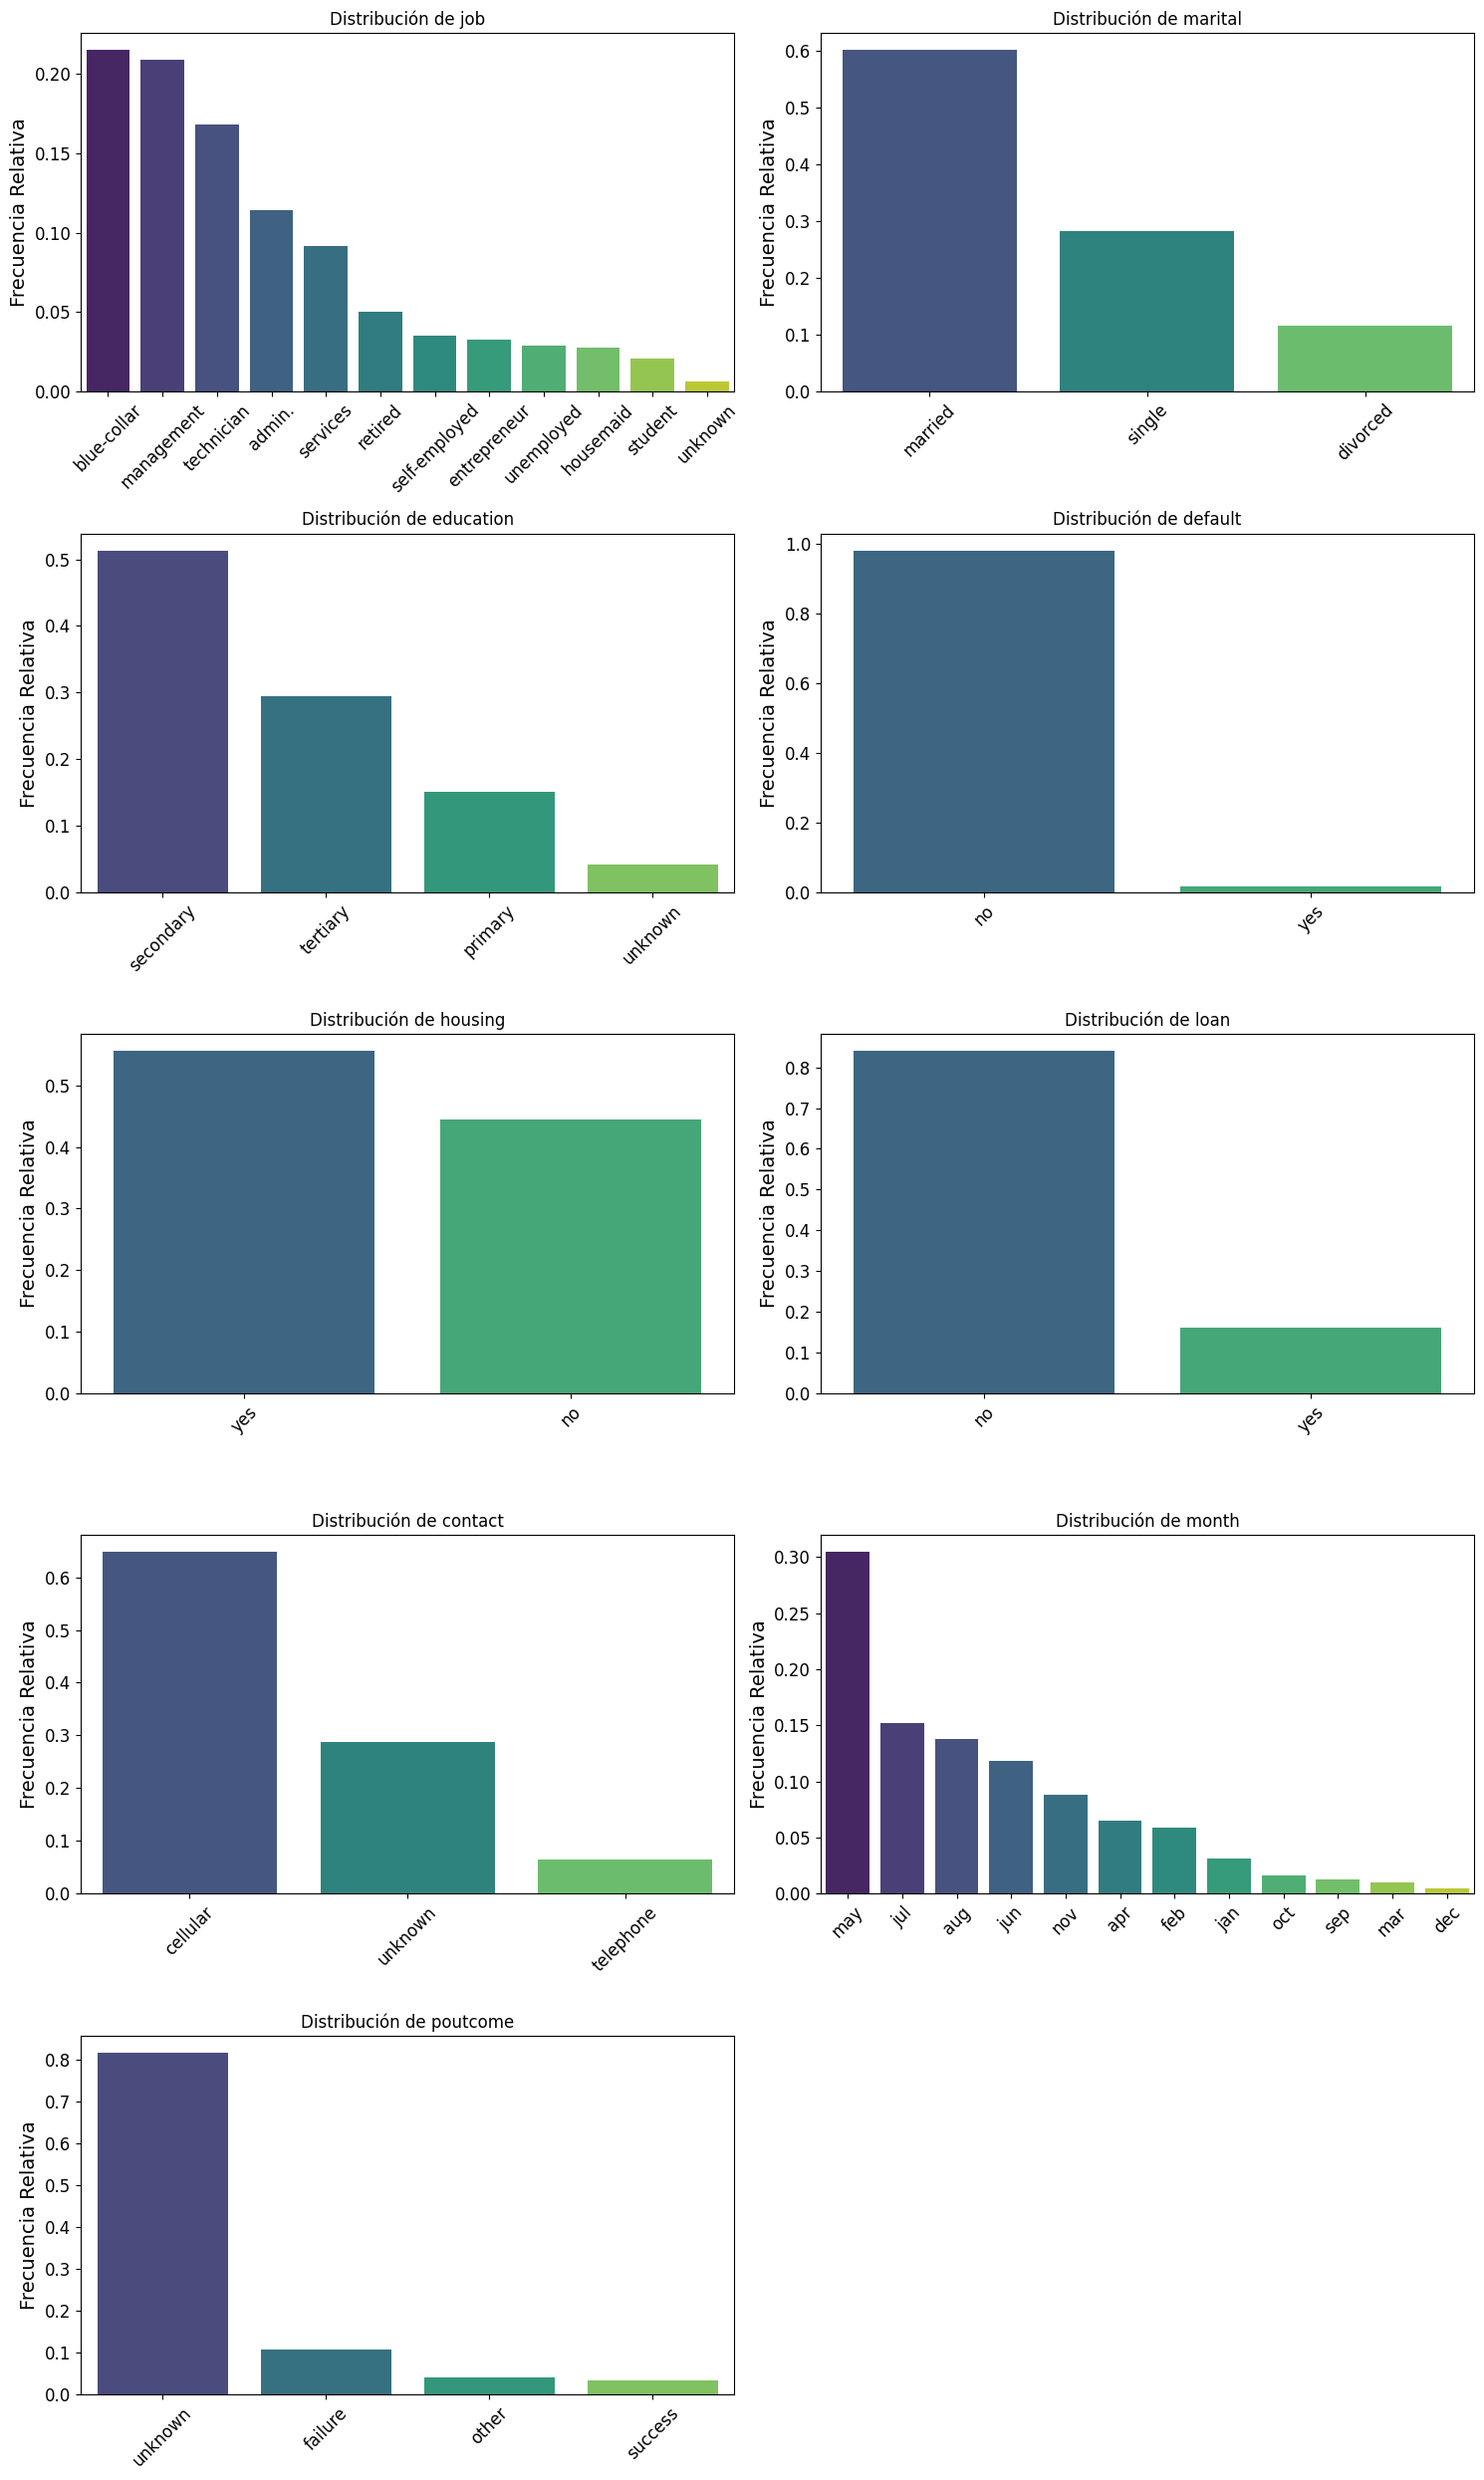

In [17]:
#Definimos lista de columnas categóricas:
col_cat=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
pinta_distribucion_categoricas(df, col_cat, relativa=True)

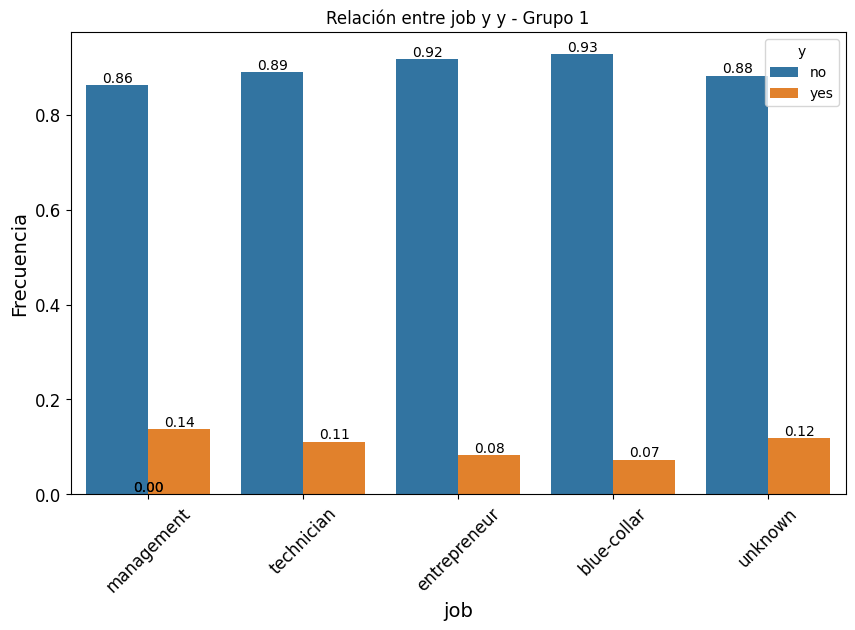

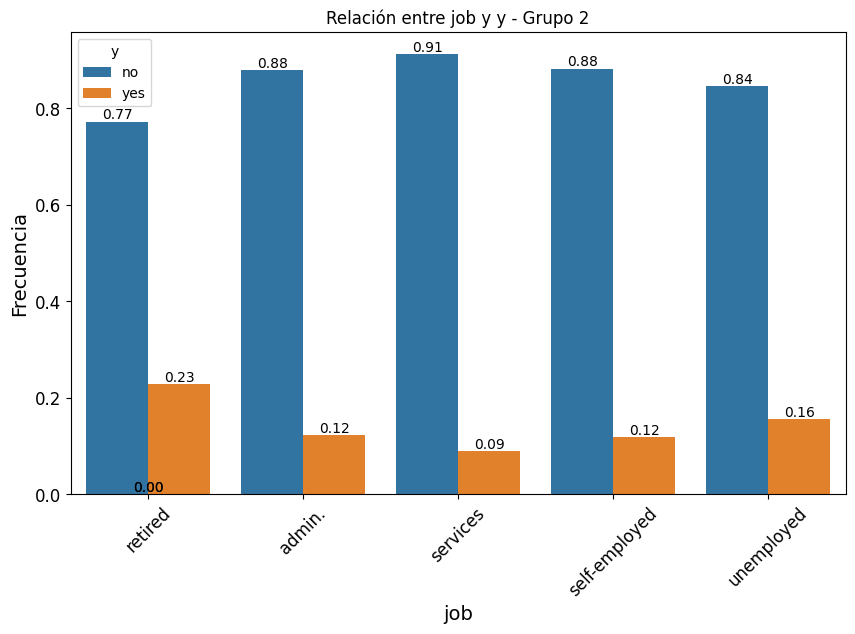

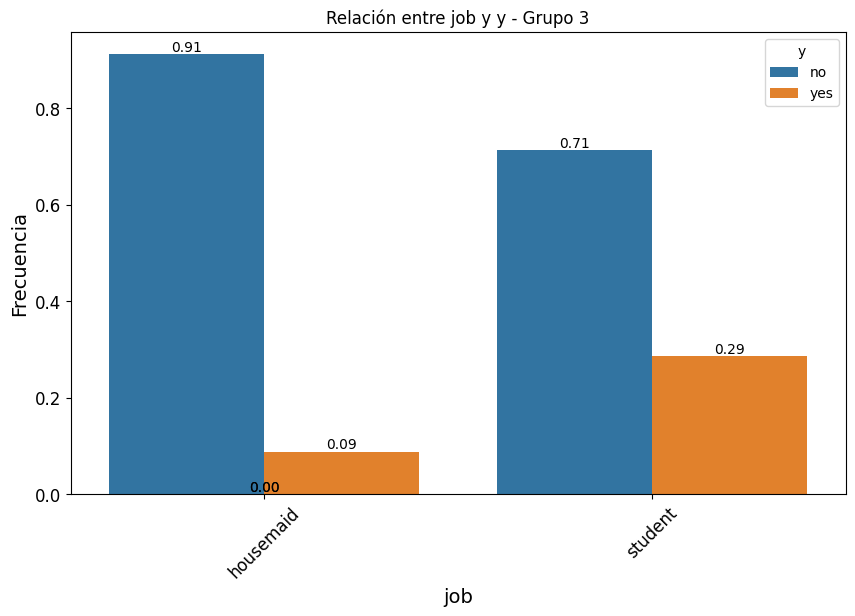

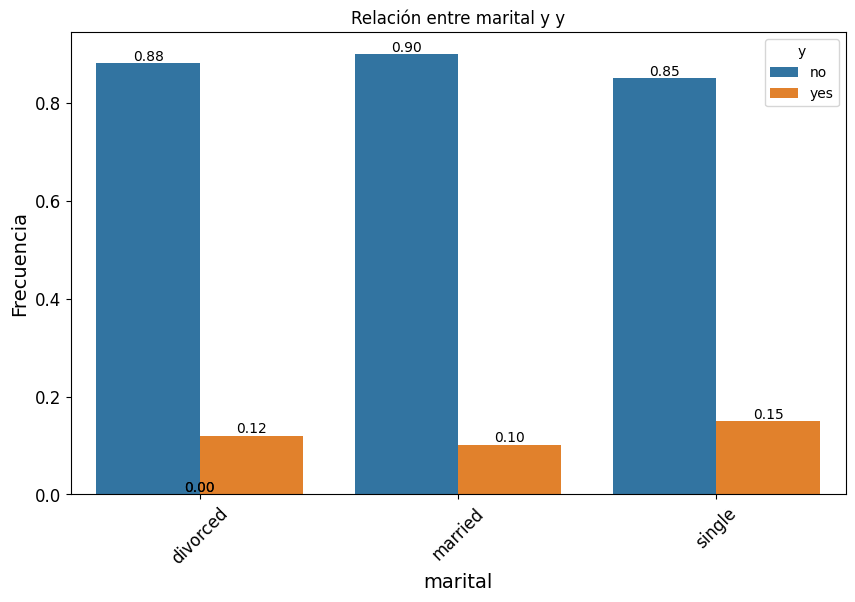

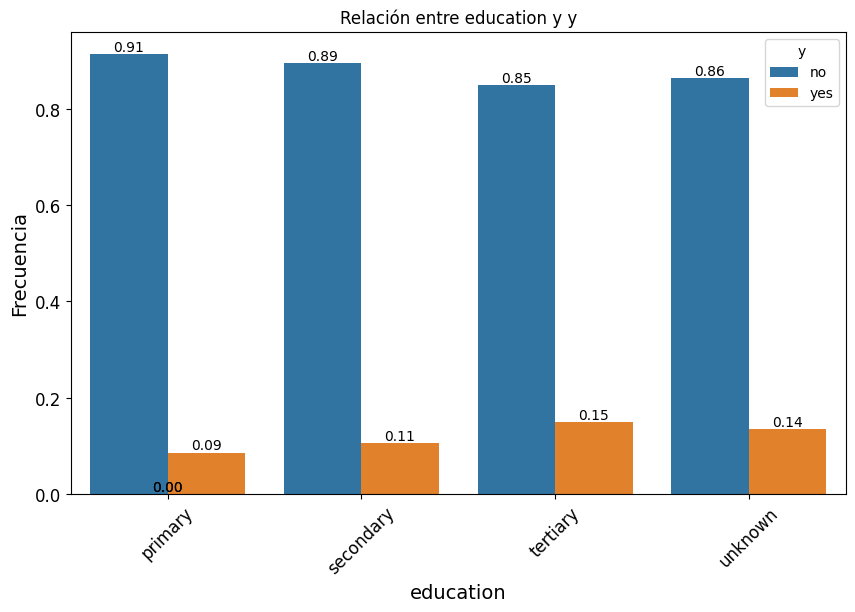

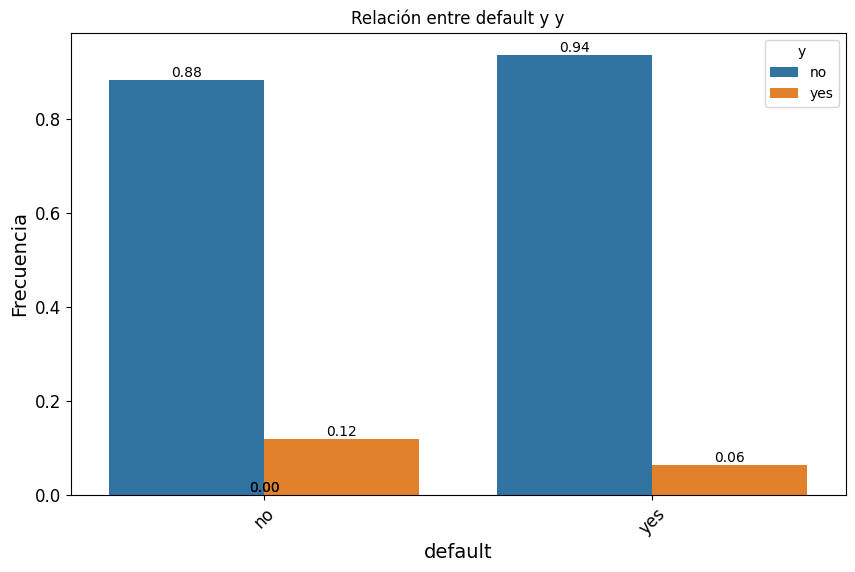

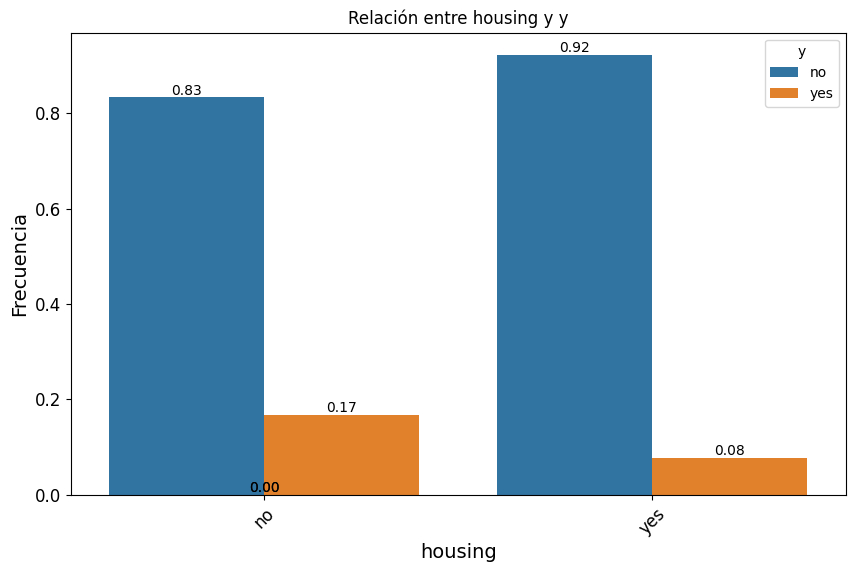

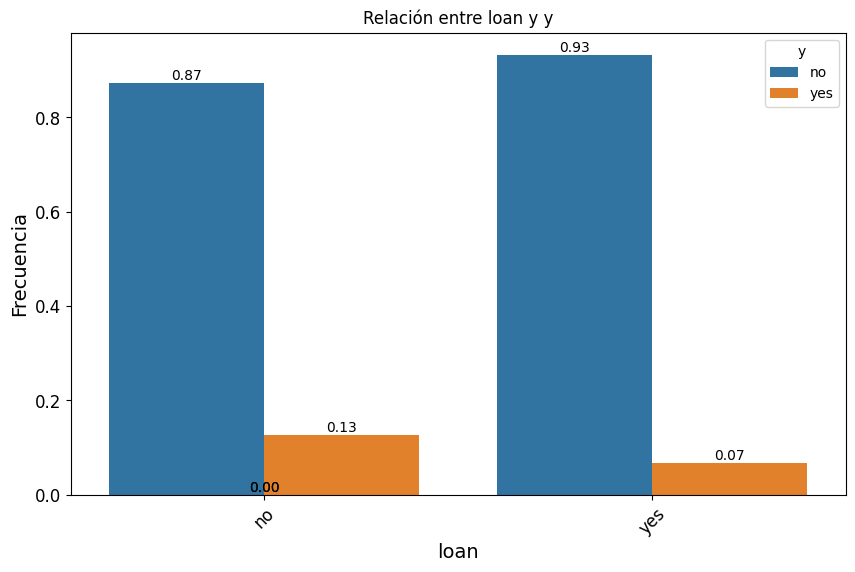

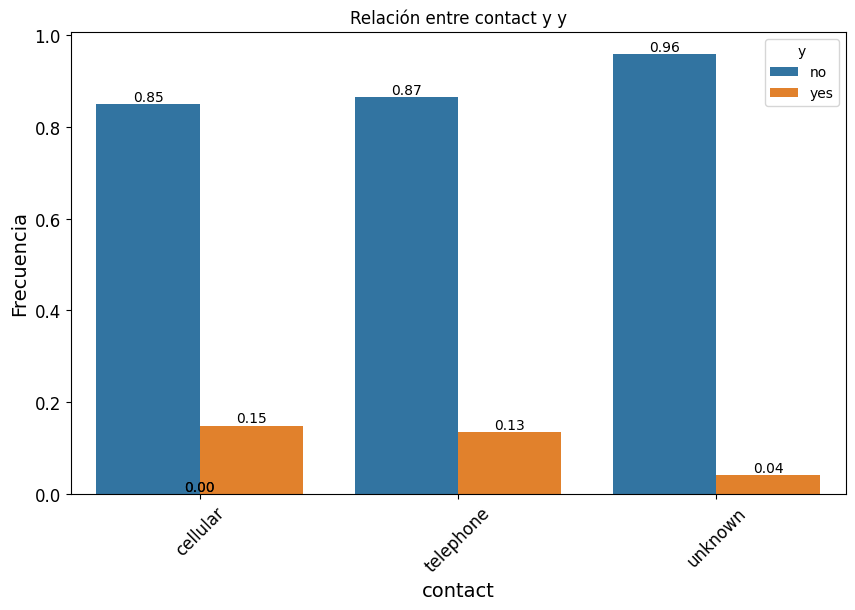

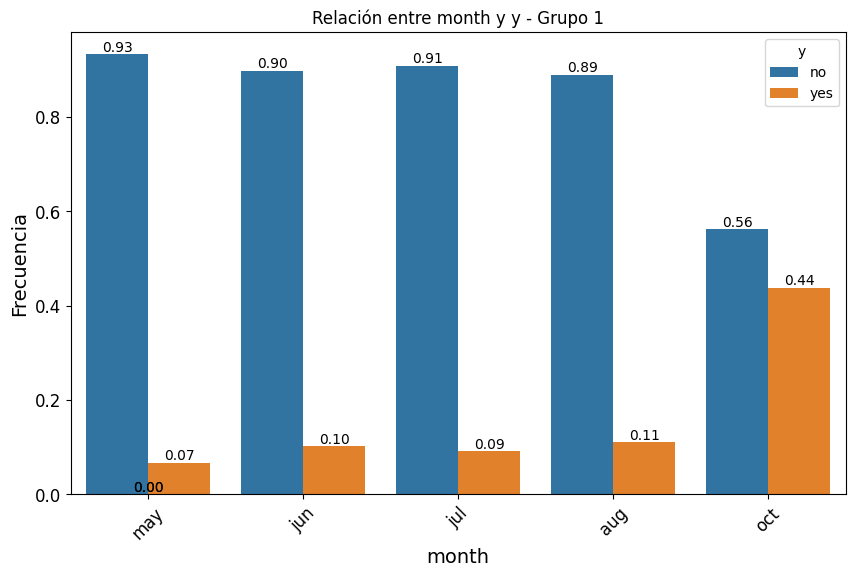

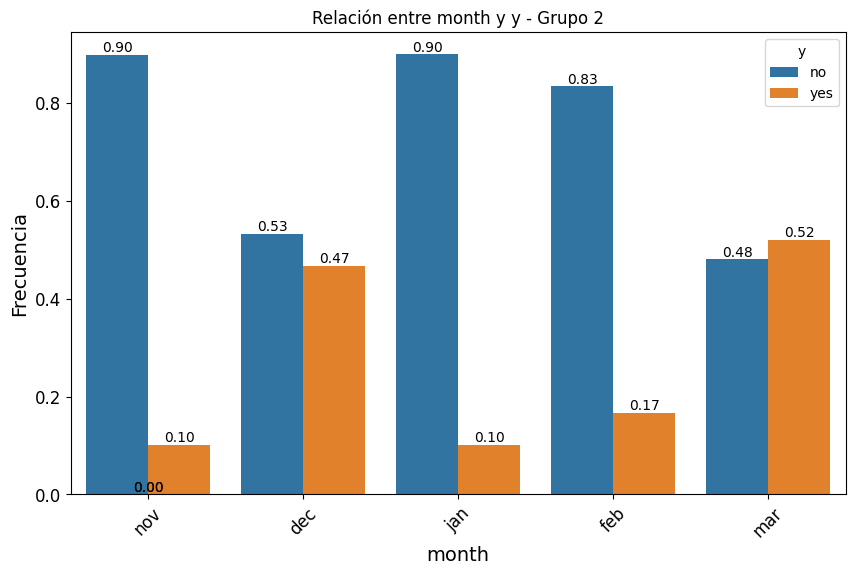

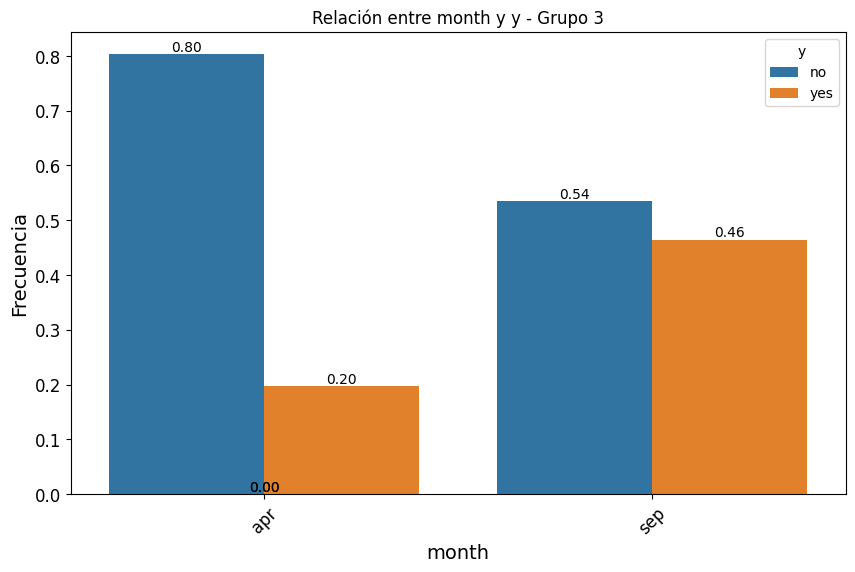

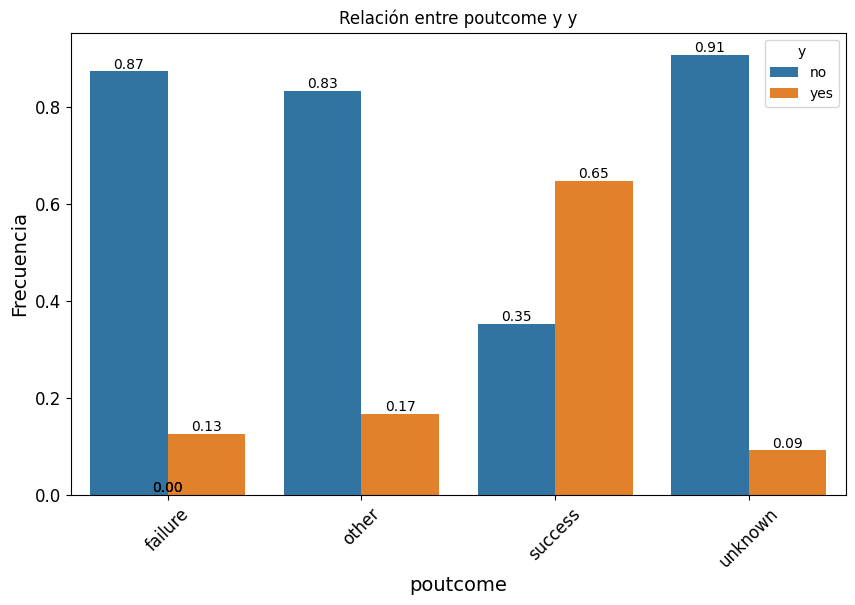

In [18]:
# Analiza la relación de cada variable con el target 'y'
for col in col_cat:
    plot_categorical_relationship_fin(df, col, 'y', relative_freq=True, show_values=True)

In [21]:
col_cat.remove("default")

In [19]:
df.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [20]:
#Aplicamos el test de chi2 para determinar la relación de las columnas categóricas con la variable target
from scipy.stats import chi2_contingency

def test_chi2(df, target, cat_cols):
    results = []
    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results.append({'Variable': col, 'p-value': p})
    
    return pd.DataFrame(results).sort_values(by='p-value')

# Uso:
print(test_chi2(df, 'y', col_cat))

    Variable        p-value
7      month   0.000000e+00
8   poutcome   0.000000e+00
6    contact  1.251738e-225
4    housing  2.918798e-192
0        job  3.337122e-172
2  education   1.626656e-51
5       loan   1.665061e-47
1    marital   2.145100e-43
3    default   2.453861e-06


In [28]:
# for col in col_num:
#    plot_grouped_histograms(df, cat_col=target, num_col=col_num, group_size=2)

In [ ]:
#Observamos balance a través de describe
#Hay valores negativos
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

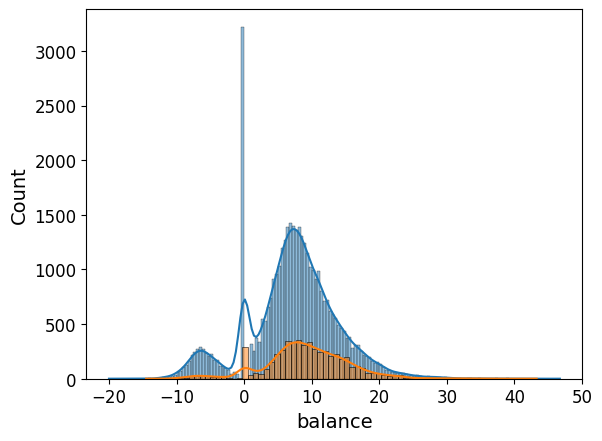

In [34]:

col="balance"

sns.histplot(np.cbrt(df[col][df["y"]=="no"]), kde=True)
sns.histplot(np.cbrt(df[col][df["y"]=="yes"]), kde=True)
plt.show()

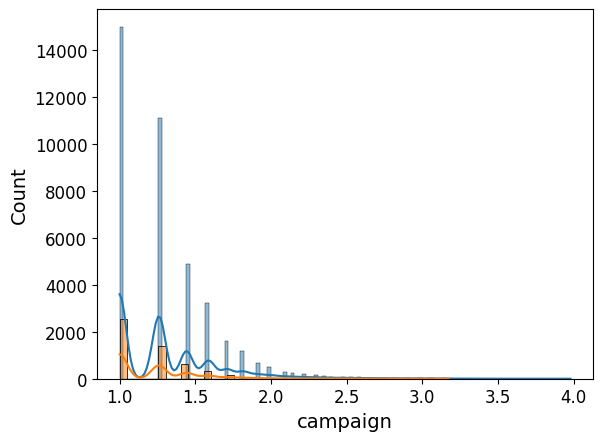

In [35]:
col="campaign"

sns.histplot(np.cbrt(df[col][df["y"]=="no"]), kde=True)
sns.histplot(np.cbrt(df[col][df["y"]=="yes"]), kde=True)
plt.show()

c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


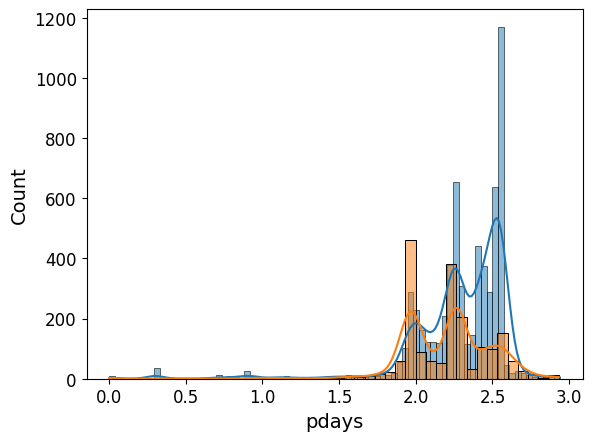

In [37]:
col="pdays"
sns.histplot(np.log10(df[col][df["y"]=="no"]), kde=True)
sns.histplot(np.log10(df[col][df["y"]=="yes"]), kde=True)
plt.show()

In [ ]:
for col in ['age', 'balance', 'duration', 'campaign']:
    plot_categorical_numerical_relationship(df, 'y', col, measure='mean', show_values=True)

In [ ]:
#Eliminamos month de las categóricas??


In [38]:
#Aplicamos transformaciones:
#Transformamos el target a numérico:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

#Aplicamos One-Hot Encoding a las categóricas:
df_final = pd.get_dummies(df, dtype=int, drop_first=True)

#Dividimos el dataset en X(features) e y(target).
X = df_final.drop(columns=['y'])
y = df_final['y']

#Split: 80% entrenamiento, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, stratify=y) #Stratify mantiene la proporción yes/no

print(f"Set de entrenamiento: {X_train.shape}")
print(f"Set de test: {X_test.shape}")


Set de entrenamiento: (33908, 42)
Set de test: (11303, 42)


In [39]:
df_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

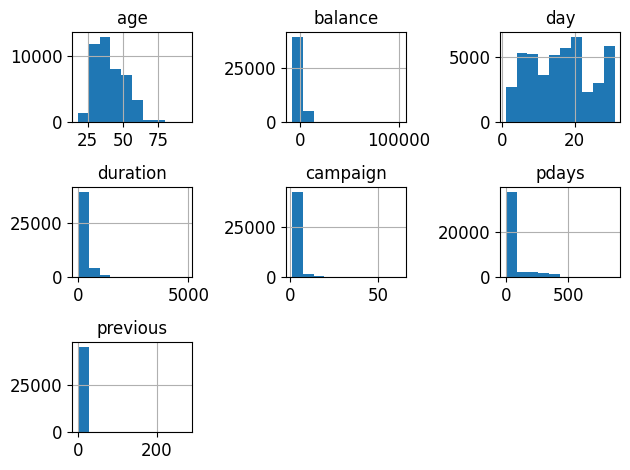

In [42]:
df[col_num].hist()
plt.tight_layout()

In [44]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'contacted_before'],
      dtype='object')

In [47]:
#Transformamos todas excepto "age" y "day"
#pdays tiene valores de -1

X_train["contacted_before"]=X_train["pdays"] != -1
X_test["contacted_before"]=X_test["pdays"] != -1

In [52]:
X_train.drop(columns=["pdays"])
X_test.drop(columns=["pdays"])

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_before
22684,33,9,25,145,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
30384,32,-149,5,93,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,True
10483,44,32,16,241,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,False
8732,48,160,4,109,3,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,False
21614,57,0,19,188,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,28,6,9,254,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,False
35592,22,252,7,206,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,False
34506,59,191,5,252,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,False
13514,29,0,9,426,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False


In [53]:
#Importamos la función de clasificación:
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo sin hiperparámetros:
tree_clf=DecisionTreeClassifier(max_depth=5,random_state=42)

#y lo entrenamos:
tree_clf.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [67]:
#Importamos la función classification_report:
from sklearn.metrics import classification_report

# A. Realizamos las predicciones sobre el juego de TEST (el examen)
y_pred_train=tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)



In [72]:
#Generamos el informe comparando las respuestas reales (y_test) con las que dio el modelo (y_pred)
print("---Informe de árbol de decision ---")
report=classification_report(y_train, y_pred_train)
print(report)

---Informe de árbol de decision ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29941
           1       0.68      0.35      0.46      3967

    accuracy                           0.90     33908
   macro avg       0.80      0.66      0.70     33908
weighted avg       0.89      0.90      0.89     33908



In [73]:
#Generamos el informe comparando las respuestas reales (y_test) con las que dio el modelo (y_pred)
print("---Informe de árbol de decision ---")
report=classification_report(y_test, y_pred_test)
print(report)

---Informe de árbol de decision ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.65      0.32      0.43      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



In [71]:
#MODELO BASELINE: Regresión logística
from sklearn.linear_model import LogisticRegression

#Instanciamos el modelo y los entrenamos
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Lo Evaluamo:
y_pred_log_train=log_reg.predict(X_train)
y_pred_log_test = log_reg.predict(X_test)



c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print("---Informe de regresión logístico ---")
print(classification_report(y_train, y_pred_log_train))

---Informe de regresión logístico ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29941
           1       0.66      0.32      0.43      3967

    accuracy                           0.90     33908
   macro avg       0.79      0.65      0.69     33908
weighted avg       0.89      0.90      0.89     33908



In [63]:
print("---Informe de regresión logístico ---")
print(classification_report(y_test, y_pred_log_test))

---Informe de regresión logístico ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.64      0.31      0.42      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.68     11303
weighted avg       0.88      0.90      0.88     11303



In [76]:
#Optimizamos los hiperparámetros del árbol:
from sklearn.model_selection import GridSearchCV

#Definimos el espacio de búsqueda
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_leaf': [1, 10, 20,100],
              "max_features":["sqrt", "log2", None],
              #'criterion': ['gini', 'entropy'], 
              "class_weight": ["balanced", None]}

#Configuramos la búsqueda
grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5, 
    scoring='balanced_accuracy' # Usamos F1 porque nos importa detectar los "yes"
)

#Entrenamos la búsqueda
grid_tree.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_tree.best_params_}")

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20}


In [88]:
grid_tree.best_score_

np.float64(0.8344639803606959)

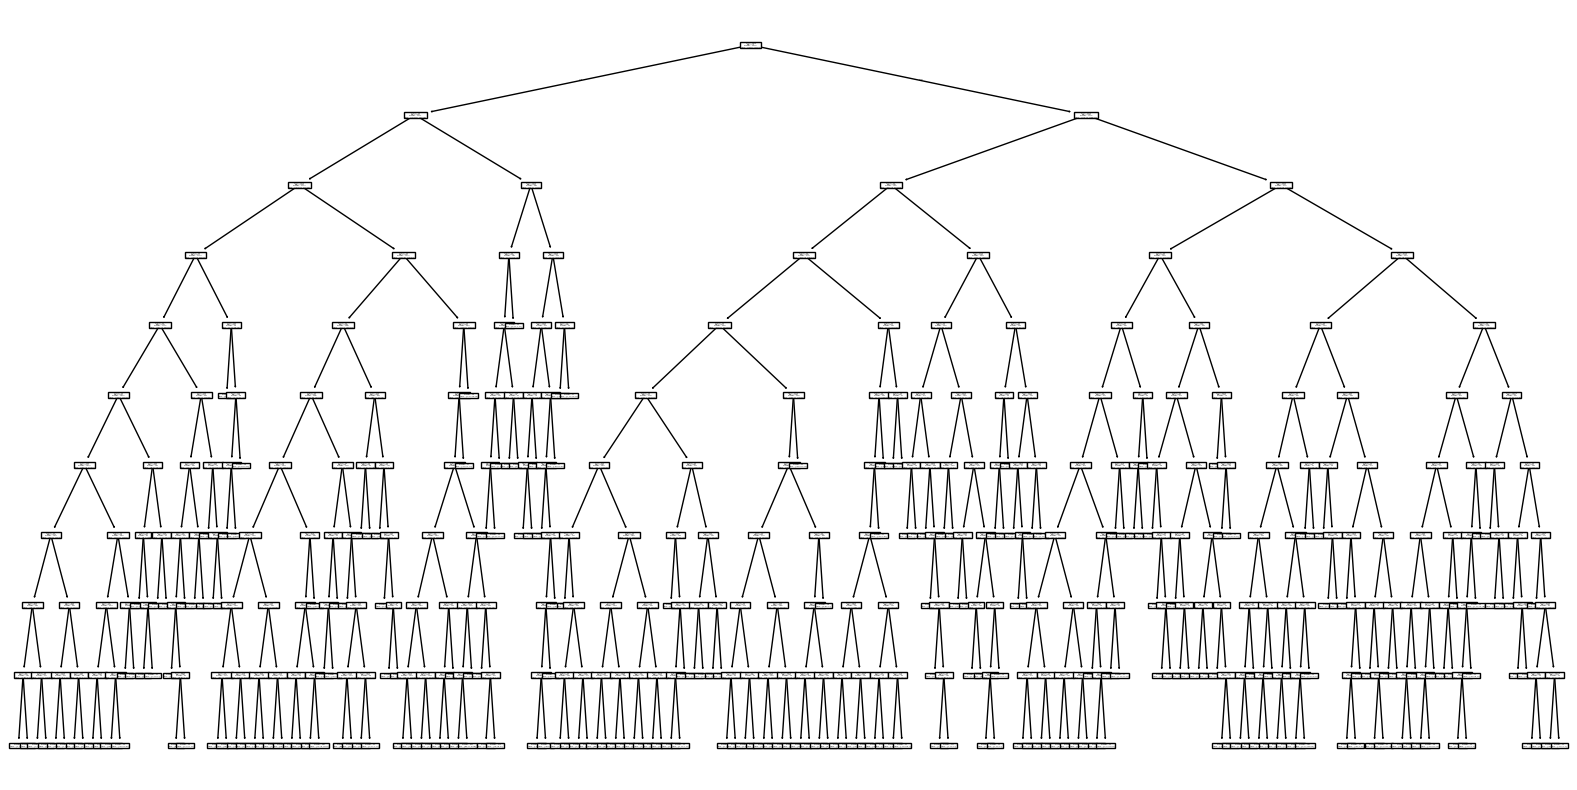

In [78]:
#Dibujamos el árbol optimizado:
from sklearn.tree import plot_tree

best_tree = grid_tree.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree);

In [84]:
#Importamos el subpaquete:
from sklearn.metrics import f1_score, accuracy_score

#Predicciones finales del árbol optimizado
y_pred_best_train = best_tree.predict(X_train)

#Comparativa rápida
print(f"F1-Score Baseline (LogReg): {f1_score(y_train, y_pred_log_train):.3f}")
print(f"F1-Score Árbol Inicial:     {f1_score(y_train, y_pred_train):.3f}")
print(f"F1-Score Árbol Optimizado:  {f1_score(y_train, y_pred_best_train):.3f}")

print(classification_report(y_train, y_pred_best_train))

F1-Score Baseline (LogReg): 0.428
F1-Score Árbol Inicial:     0.459
F1-Score Árbol Optimizado:  0.550
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     29941
           1       0.39      0.93      0.55      3967

    accuracy                           0.82     33908
   macro avg       0.69      0.87      0.72     33908
weighted avg       0.92      0.82      0.85     33908

